In [85]:
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [261]:
an_image = PIL.Image.open("2.png")
png_size = an_image.size
image_sequence = an_image.getdata()
image_array = np.array(image_sequence)
print(png_size)

(168, 146)


In [262]:
print(image_array.shape)

(24528, 4)


In [263]:
df = pd.DataFrame(image_array, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,255,255,255,255
1,255,255,255,255
2,255,255,255,255
3,255,255,255,255
4,255,255,255,255
...,...,...,...,...
24523,255,255,255,255
24524,255,255,255,255
24525,255,255,255,255
24526,255,255,255,255


In [264]:
df.a.unique()

array([255, 131,   8, 222])

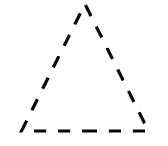

In [265]:
an_image


In [266]:
# (8, 8,8,255) чёрный пиксель 
modP = np.zeros(png_size)
for i in range(png_size[0]):
    for j in range(png_size[1]):
        if image_array[i +j *png_size[0]][0] == 8:
                if image_array[i +j *png_size[0]][1] == 8:
                    if image_array[i +j *png_size[0]][2] == 8:
                        modP[i][j] = 1


In [267]:
n_dorts = sum(sum(modP))
n_dorts

510.0

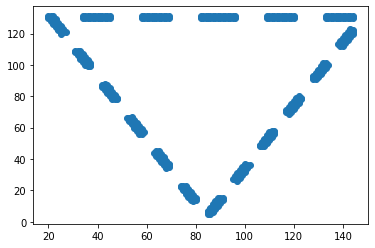

In [268]:
a=list()
b = list()
for i in range(png_size[0]):
    for j in range(png_size[1]):
        if modP[i][j] == 1:
            a.append(i)
            b.append(j)
plt.scatter(a, b)
plt.show()

In [269]:
min_l = min(a)
dop_l = 1
max_r = max(a)
dop_r =1
max_h = max(b)
dop_h = 1
min_u = min(b)
dop_u = 1
dorts = list()
for i in range(png_size[0]):
    for j in range(png_size[1]):
        if modP[i][j] == 1:
            if i  == min_l and dop_l == 1:
                dop_l = 0
                dorts.append([i, j])
            if i  == max_r and dop_r == 1:
                dop_r = 0
                dorts.append([i, j])
            if j == min_u and dop_u ==1:
                dop_u = 0
                dorts.append([i, j])
            if j == max_h and dop_h ==1:
                dop_h = 0
                dorts.append([i, j])

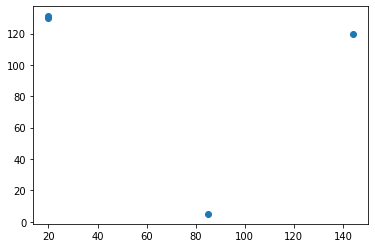

[[20, 130], [20, 131], [85, 5], [144, 120]]


In [270]:
plt.scatter([dorts[0][0], dorts[1][0], dorts[2][0], dorts[3][0]], [dorts[0][1], dorts[1][1], dorts[2][1], dorts[3][1],])
plt.show()
print(dorts)

In [271]:
trangl = 0
square = 0
rectangle = 0
center = [0, 0]
r = 0
for i in dorts:
    for j in dorts:
        if i != j and ((i[0] -j[0])**2 +(i[1]- j[1])**2) >= 18:
            if (i[0] - j[0])**2 < 9 and (i[1] - j[1])**2 > 4:
                r +=1
                center[1] = int(abs(i[1] - j[1]) / 2.0)
            if (i[1] - j[1])**2 < 9 and (i[0] - j[0])**2 > 4:  
                r +=1
                center[0] = int(abs(i[0] - j[0]) / 2.0)

for i in range(4):
    for j in range(4):
        temp1 = 0
        temp2 = 0
        if i != j:
            if ((dorts[i][0] -dorts[j][0])**2 +(dorts[i][1]- dorts[j][1])**2) <= 18:
                if r >= 2:
                    for k in range(center[0],png_size[0] ):
                        for m in range(center[1], png_size[1]):
                            if modP[k][m] == 1:
                                temp1 +=1
                    for k in range(center[0]):
                        for m in range(center[1]):
                            if modP[k][m] == 1:
                                temp2 +=1
                    if temp1 + temp2 > n_dorts / 8:
                        rectangle = 0.5
                        square = 0.5 
                    else:
                        trangal = 1
                else:
                    trangal =1
x1 = 0
y1 = 0
for i in dorts:
    for j in dorts:
        if i!=j:
            if abs(i[0] - j[0]) > x1:
                x1  = abs(i[0] - j[0])
            if abs(i[1] - j[1]) > x1:
                y1  = abs(i[1] - j[1])
if abs(x1 - y1) < 5 and square == 0.5 and rectangle == 0.5:
    squere = 1
    print("It's squere")
if abs(x1 - y1) > 5 and square == 0.5 and rectangle == 0.5:
    rectangle = 1
    print("It's rectangle")
if trangal == 1 and rectangle + square < 1:
    print("It's triangular")



It's triangular
